# SVM

Classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'<br>
day	day of the week: 'mon' to 'sun'<br>
FFMC	FFMC index from the FWI system: 18.7 to 96.20<br>
DMC	DMC index from the FWI system: 1.1 to 291.3<br>
DC	DC index from the FWI system: 7.9 to 860.6<br>
ISI	ISI index from the FWI system: 0.0 to 56.10<br>
temp	temperature in Celsius degrees: 2.2 to 33.30<br>
RH	relative humidity in %: 15.0 to 100<br>
wind	wind speed in km/h: 0.40 to 9.40<br>
rain	outside rain in mm/m2 : 0.0 to 6.4<br>
Size_Categorie 	the burned area of the forest ( Small , Large<br>

# EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
forest = pd.read_csv('forestfires.csv')

In [7]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
forest.shape

(517, 31)

In [12]:
forest.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Visualization

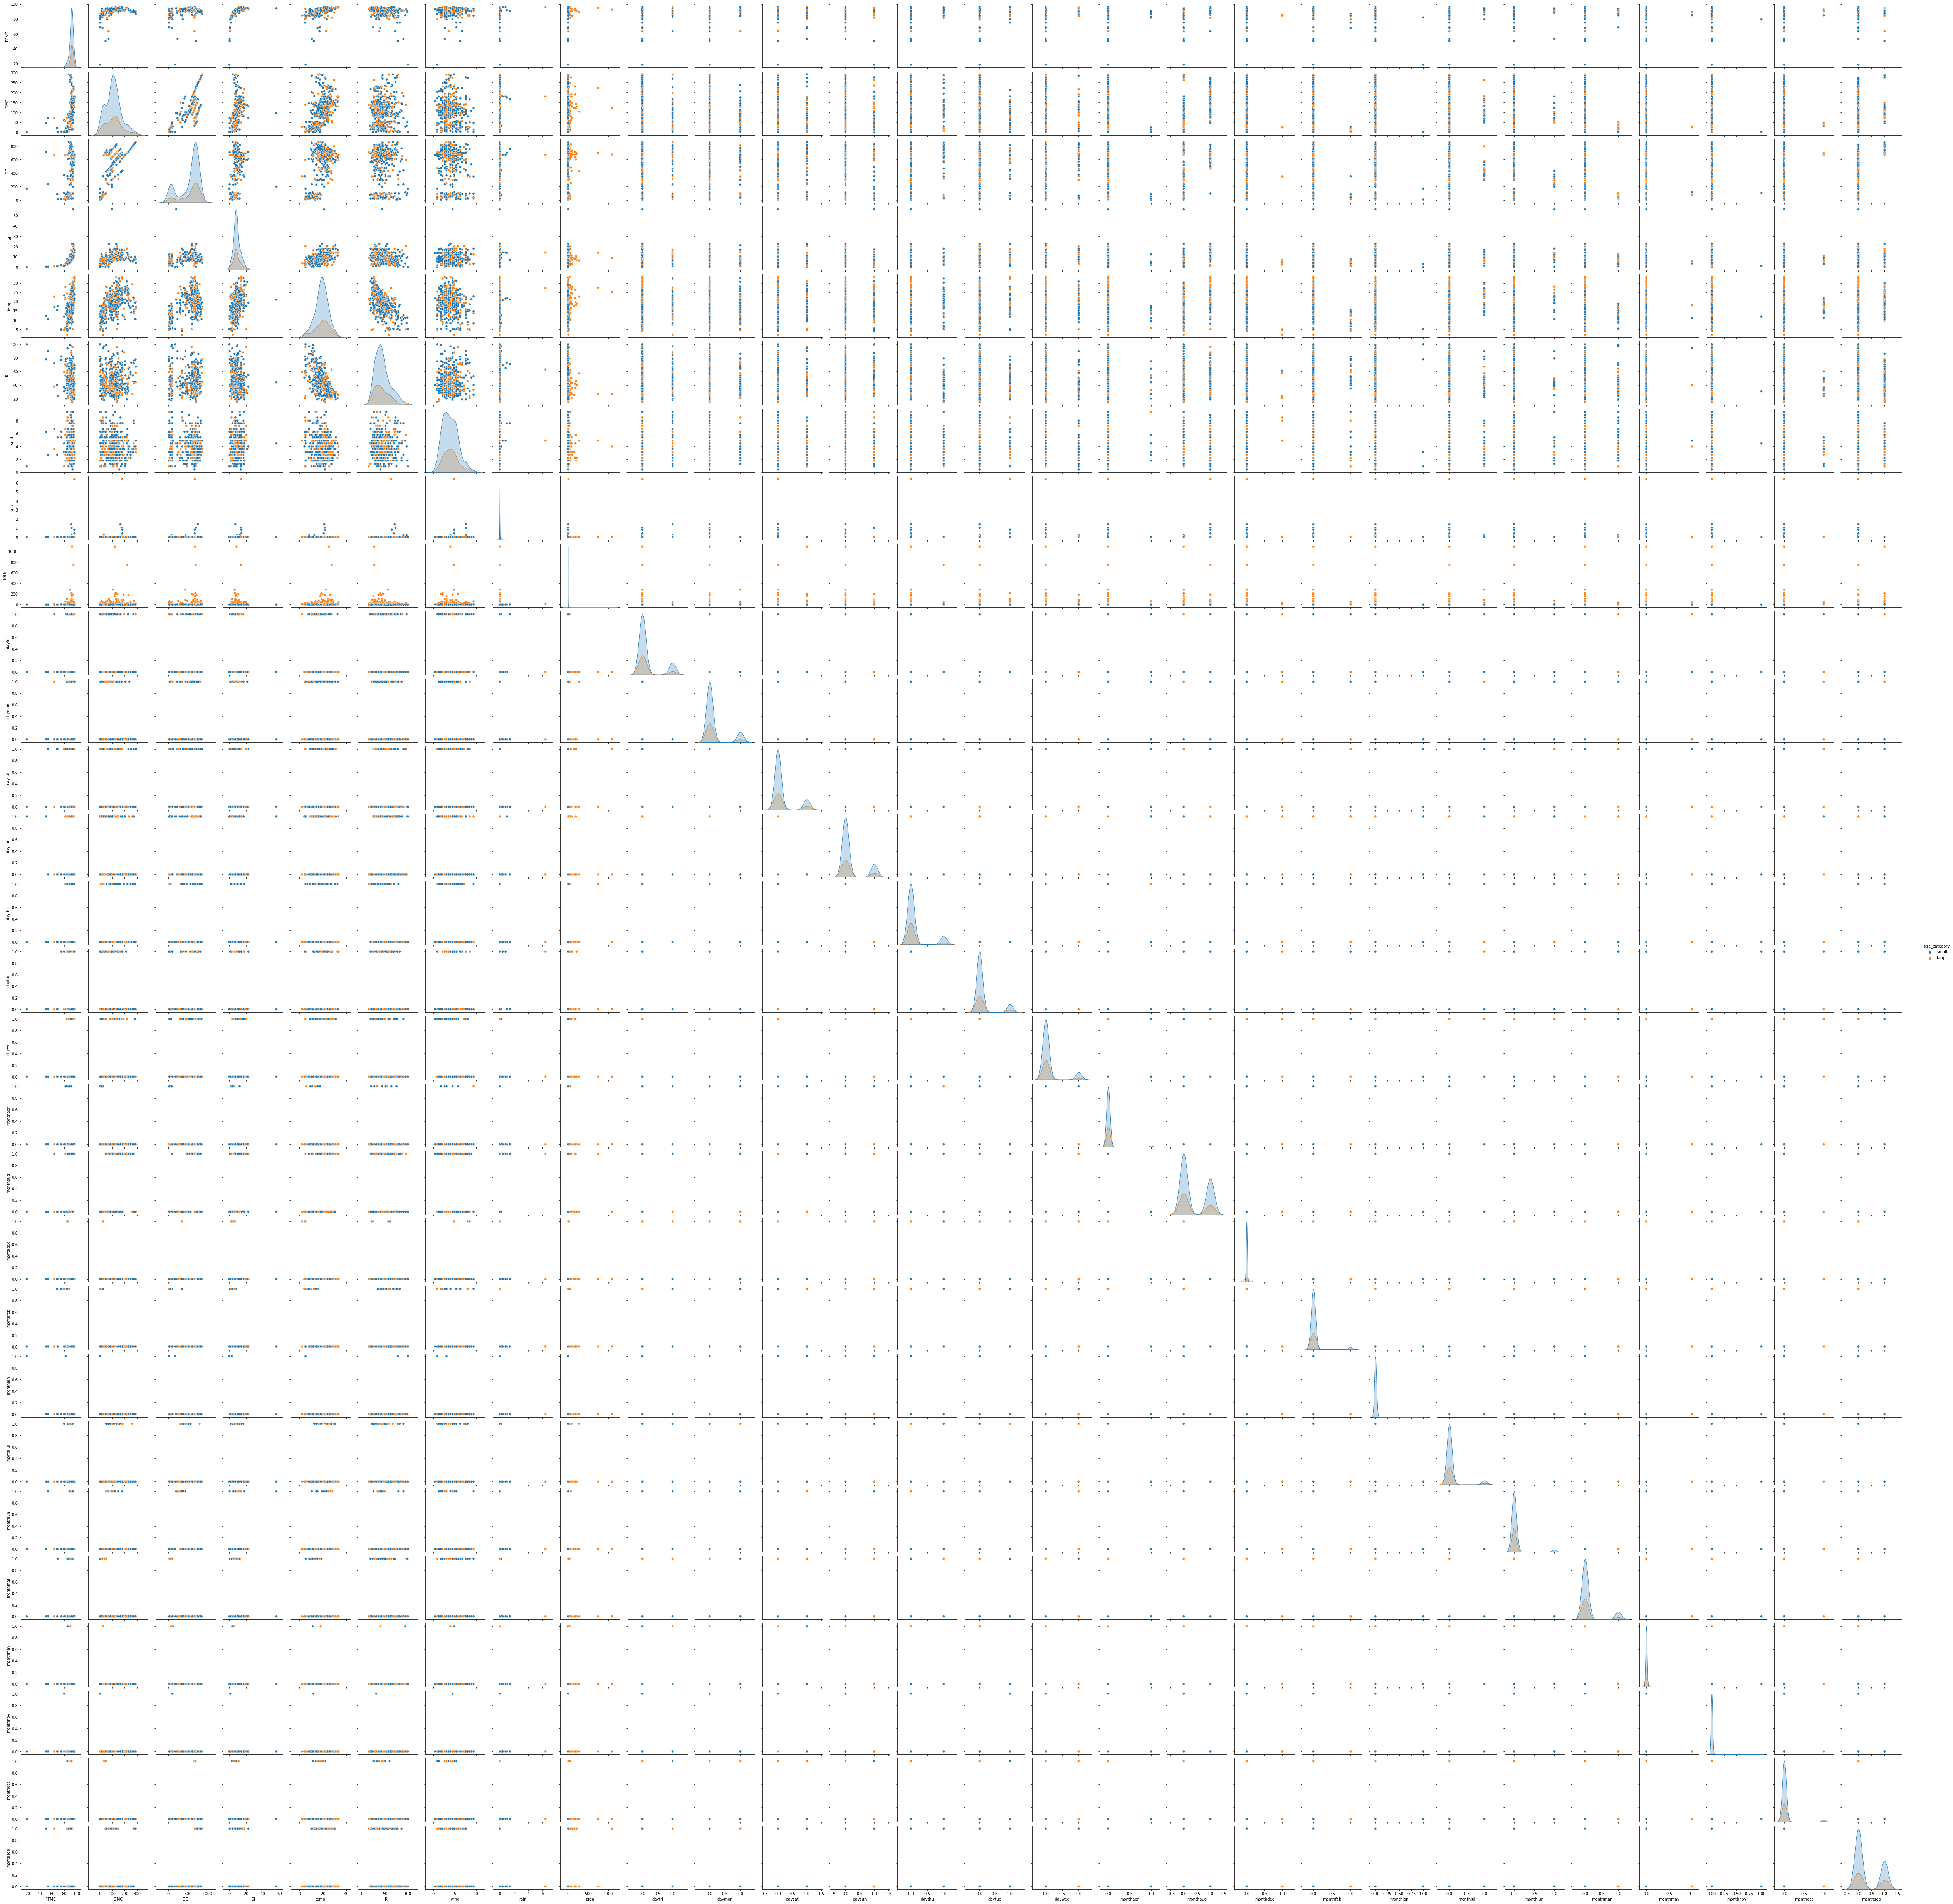

In [15]:
sns.pairplot(forest, hue = 'size_category')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

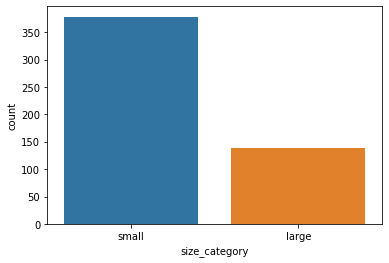

In [18]:
sns.countplot(forest['size_category'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

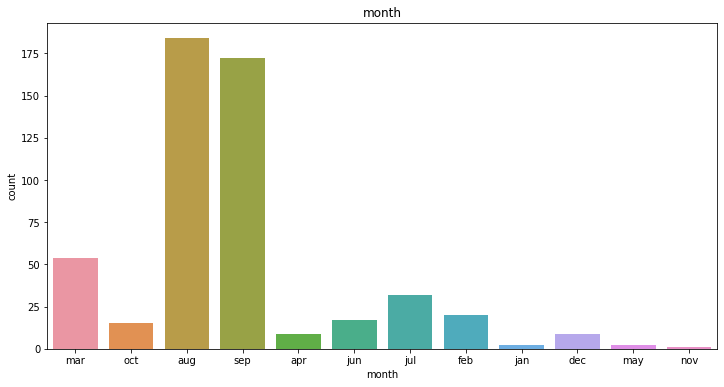

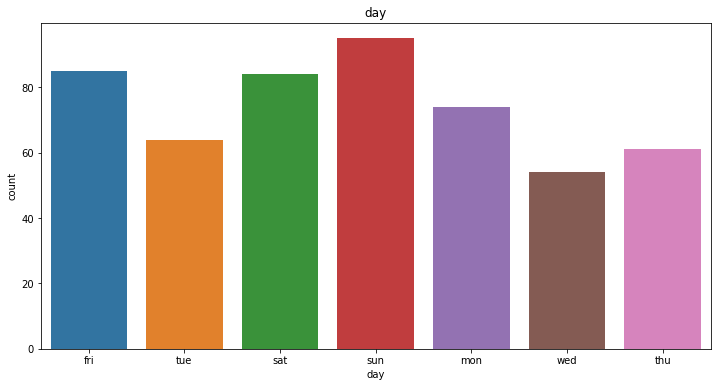

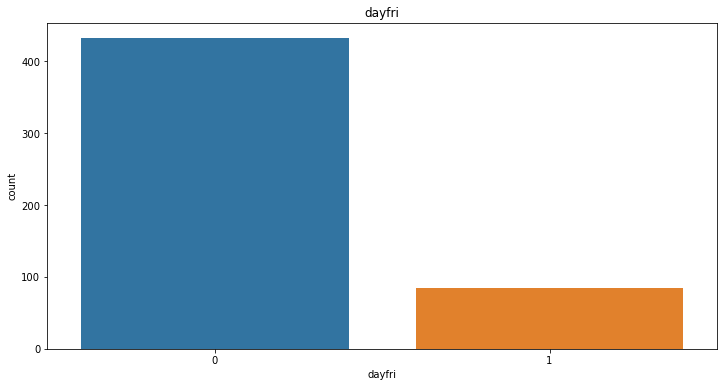

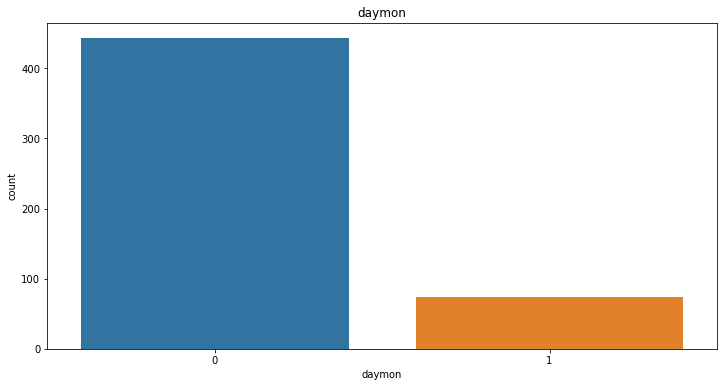

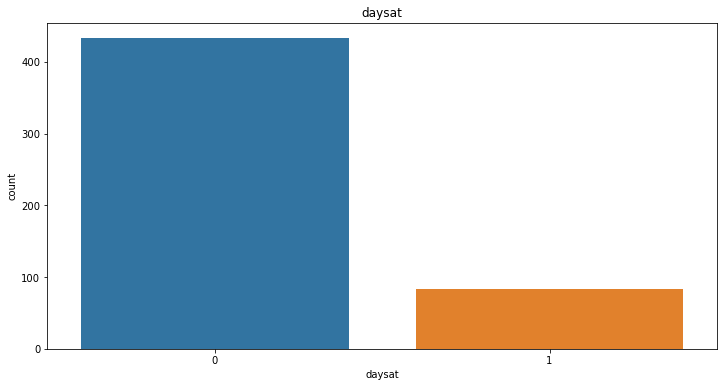

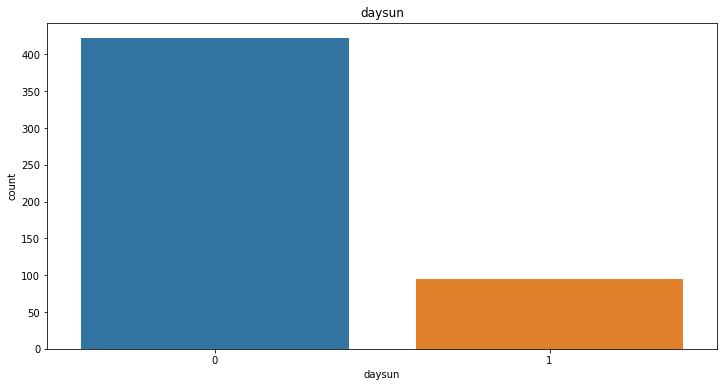

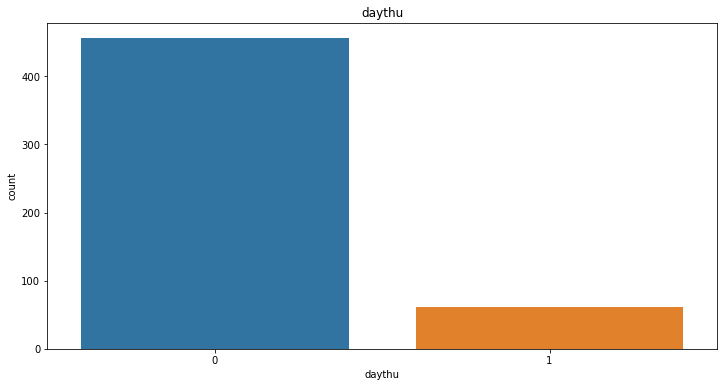

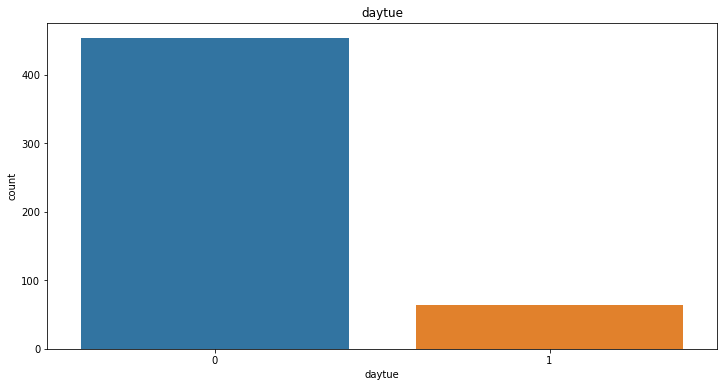

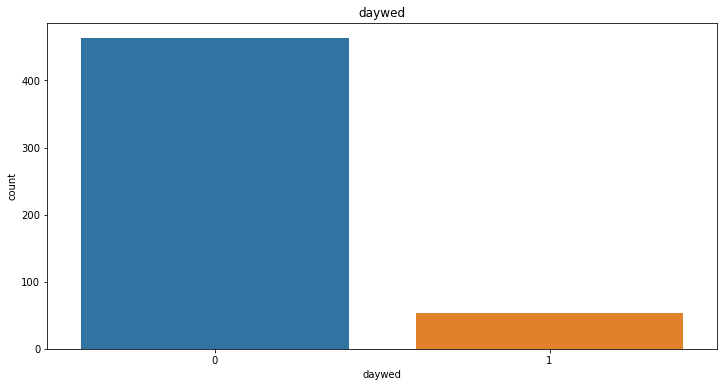

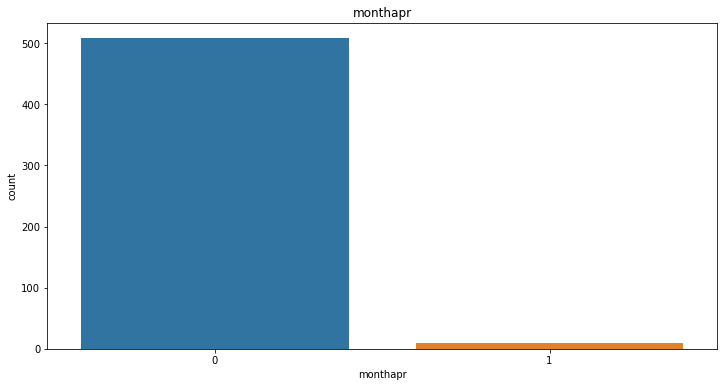

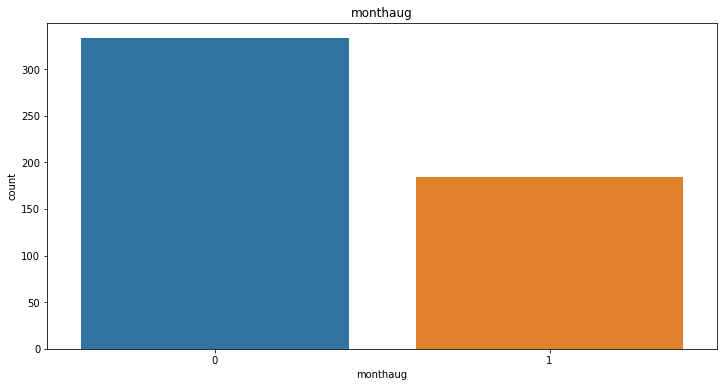

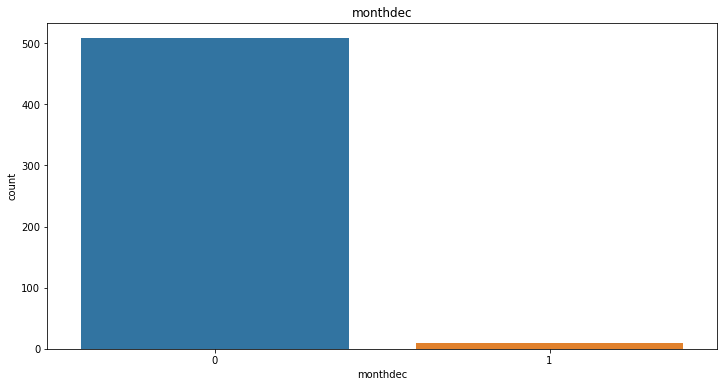

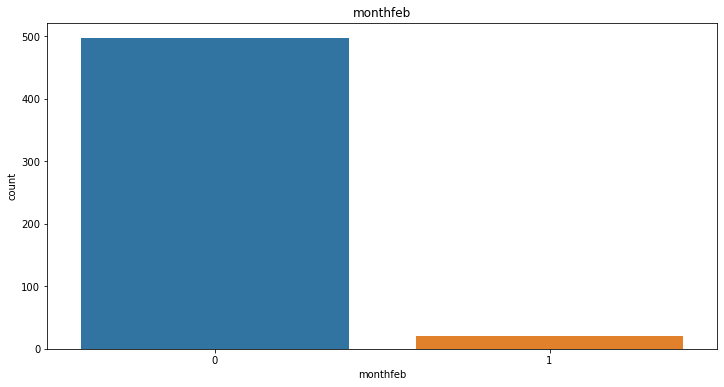

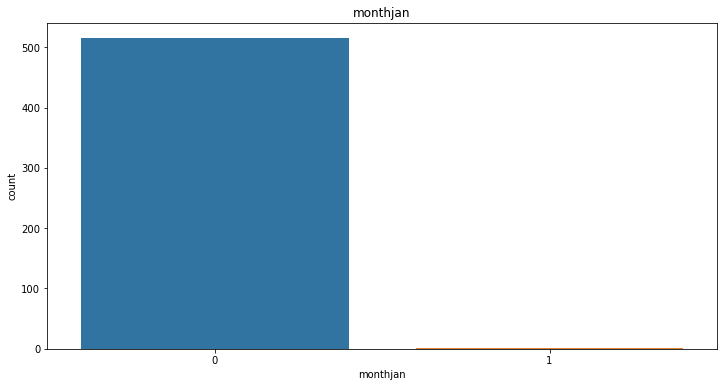

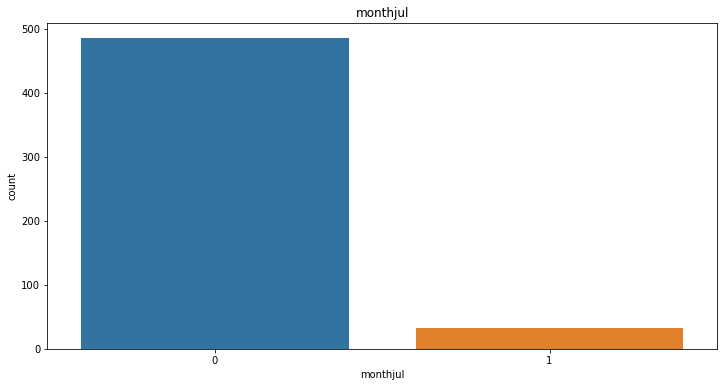

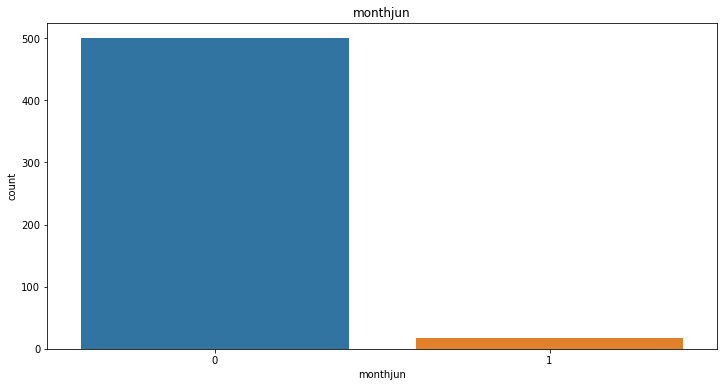

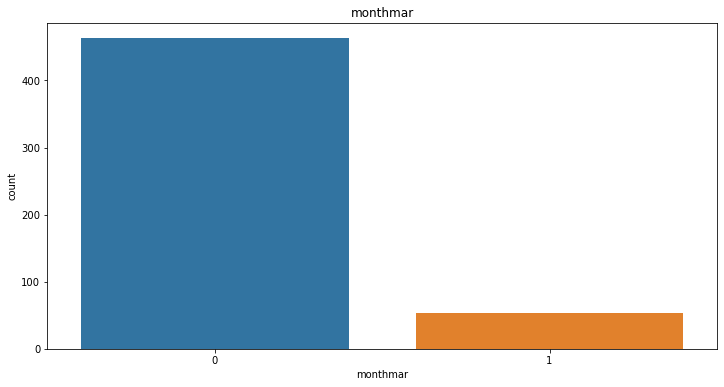

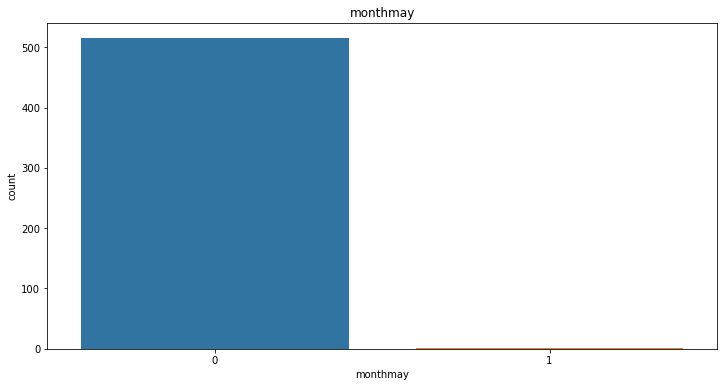

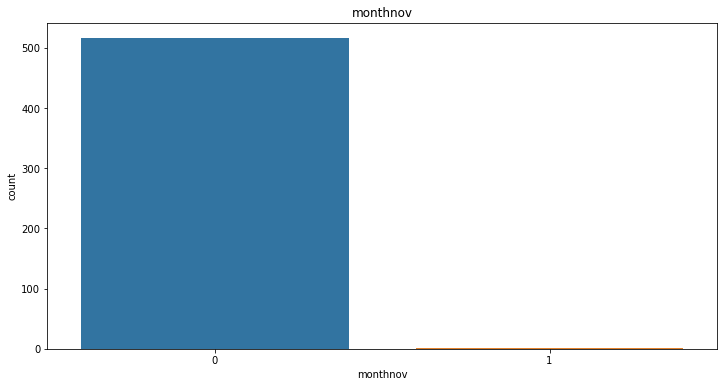

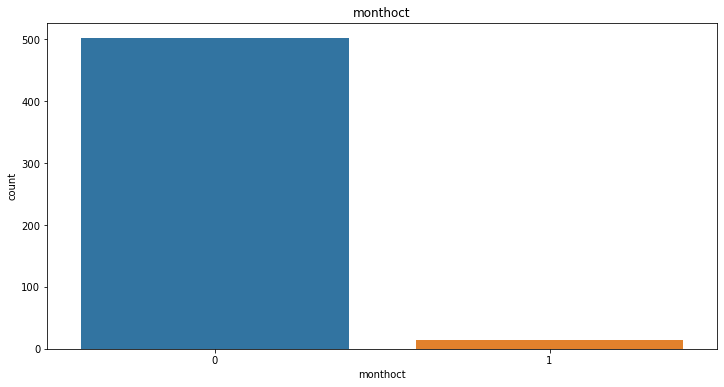

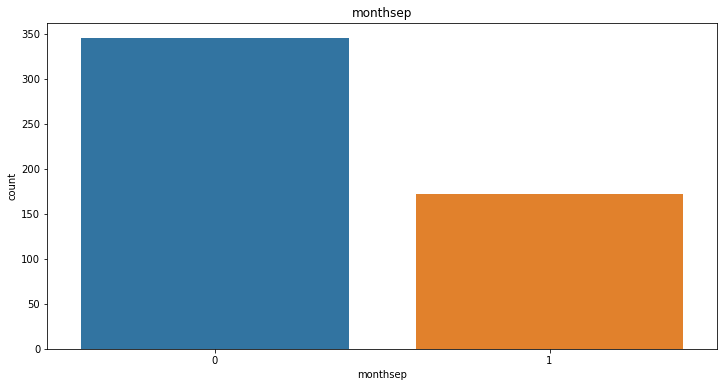

In [20]:
categ = ['month',
 'day',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep']
for col in categ:
    plt.figure(figsize = (12,6))
    sns.countplot(forest[col])
    plt.title(col)

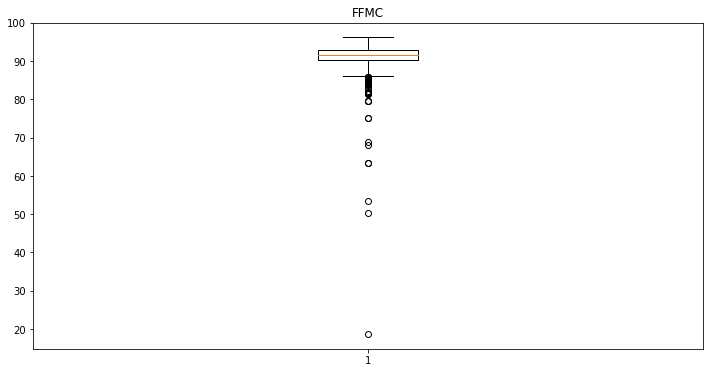

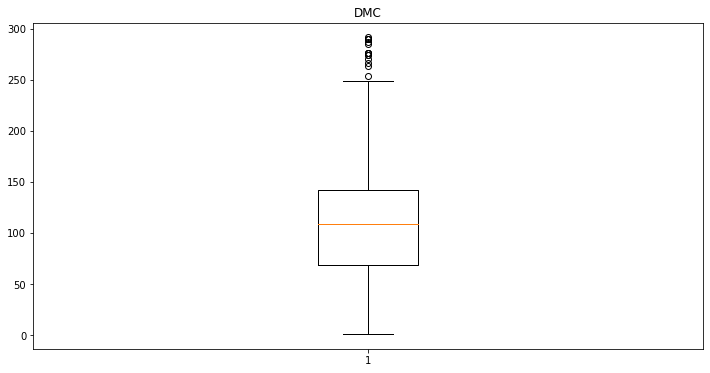

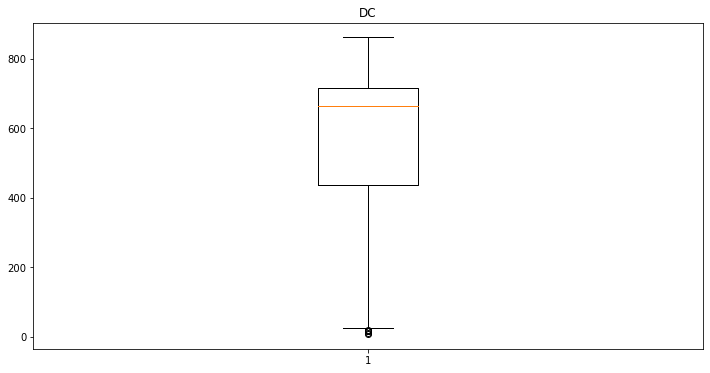

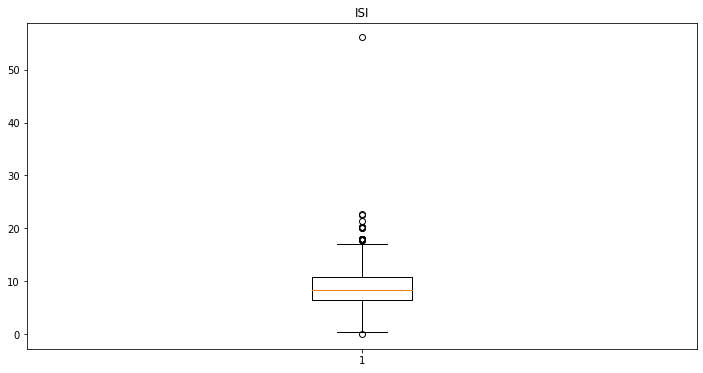

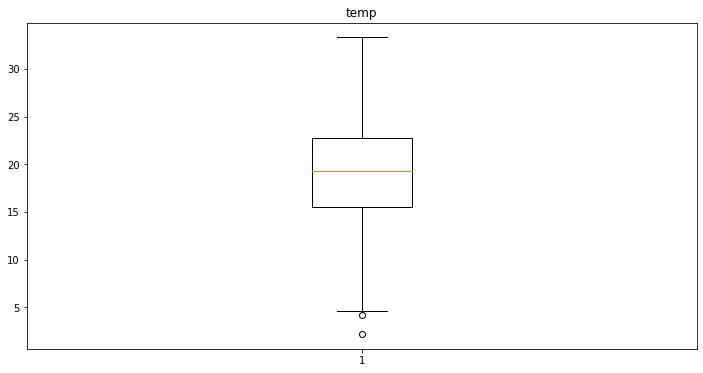

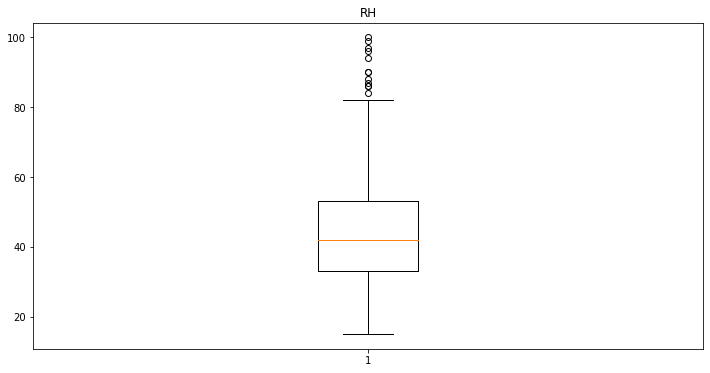

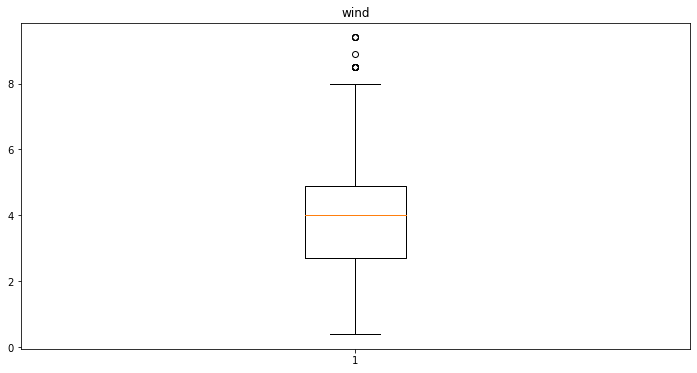

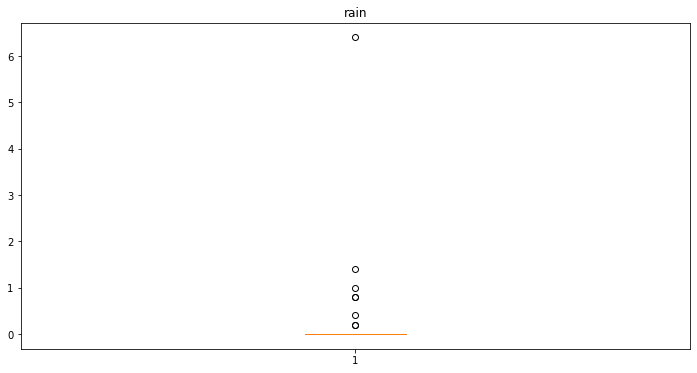

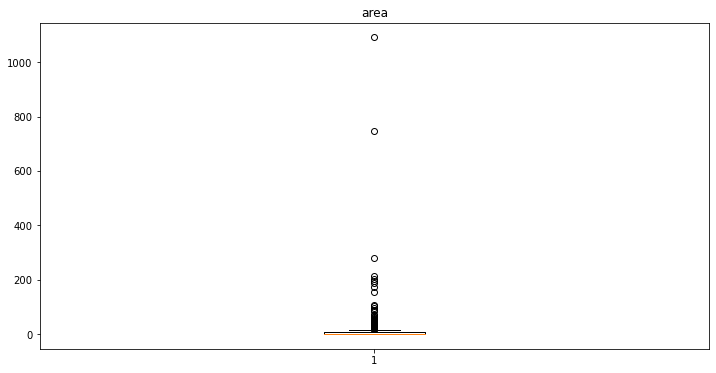

In [22]:
categ = ['FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',]
for col in categ:
    plt.figure(figsize = (12,6))
    plt.boxplot(forest[col])
    plt.title(col)

# PPScore

In [17]:
import ppscore as pps
pps.matrix(forest)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least popu

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,month,month,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,month,day,0.024973,classification,True,weighted F1,0.127660,0.149445,DecisionTreeClassifier()
2,month,FFMC,0.083404,regression,True,mean absolute error,2.534429,2.323049,DecisionTreeRegressor()
3,month,DMC,0.403439,regression,True,mean absolute error,49.064410,29.269920,DecisionTreeRegressor()
4,month,DC,0.753101,regression,True,mean absolute error,176.316828,43.532471,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
956,size_category,monthmay,0.000000,regression,True,mean absolute error,0.003868,0.007678,DecisionTreeRegressor()
957,size_category,monthnov,0.000000,regression,True,mean absolute error,0.001934,0.003858,DecisionTreeRegressor()
958,size_category,monthoct,0.000000,regression,True,mean absolute error,0.029014,0.056528,DecisionTreeRegressor()
959,size_category,monthsep,0.000000,regression,True,mean absolute error,0.332689,0.444924,DecisionTreeRegressor()


# Label Encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder
forest["month"] = LabelEncoder().fit_transform(forest["month"])
forest["day"] = LabelEncoder().fit_transform(forest["day"])
forest["size_category"] = LabelEncoder().fit_transform(forest["size_category"])
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


# Normalization Function

In [27]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
# Normalized data frame
forest_norm = norm_func(forest)
forest_norm.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
516,0.818182,0.833333,0.784516,0.006547,0.115867,0.019608,0.308682,0.188235,0.455556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Feature Engineering

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = forest_norm.drop(["size_category"],axis = 1)
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
Y = forest_norm.iloc[:,-1]
Y 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
512    0.0
513    0.0
514    0.0
515    1.0
516    1.0
Name: size_category, Length: 517, dtype: float64

In [42]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,n_features_to_select=14).fit(X, Y)

In [43]:
# Feature Ranking:
fit.ranking_

array([ 7, 16,  3,  1, 11, 10,  1,  1,  1,  1,  1, 12, 14,  1,  2,  4,  1,
       13,  9,  1,  1,  1,  1,  6,  1,  8,  1,  5, 15, 17])

In [46]:
X.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.636364,0.0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Selecting only top 14 Features

In [47]:
X_feat = X.drop(["day","monthoct","monthsep"], axis=1)
X_feat.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov
0,0.636364,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.909091,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909091,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.636364,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.636364,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
X1 = X_feat
Y1 = Y

# Building Model

In [50]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10, 100, 1000, 10000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel' : ['rbf']}

In [51]:
grid = GridSearchCV(SVC(), param_grid,  cv = 10)
grid.fit(X1, Y1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']})

In [52]:
print("Best Hyperparameter:-",grid.best_params_,"\n",
      "Best Accuracy Score:-",grid.best_score_)

Best Hyperparameter:- {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'} 
 Best Accuracy Score:- 0.8685520361990952


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 30)

In [54]:
Model = SVC( C = 10000, gamma = 0.01, kernel = "rbf")
results = cross_val_score(Model, X1, Y1, cv = kfold)

In [55]:
print("Model Score by Cross Validation.:-",round(results.mean(),3)*100,"%")

Model Score by Cross Validation.:- 87.5 %
